# Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [30]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [31]:
# importing data
df_tips = pd.read_csv("dades/tips.csv", encoding="utf-8")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Coneixent les dades

In [32]:
df_tips.shape

(244, 7)

In [33]:
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [34]:
df_tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [35]:
df_tips.day.nunique()

4

In [36]:
df_tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [37]:
df_tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [38]:
df_tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Exploració de dues variables numèriques

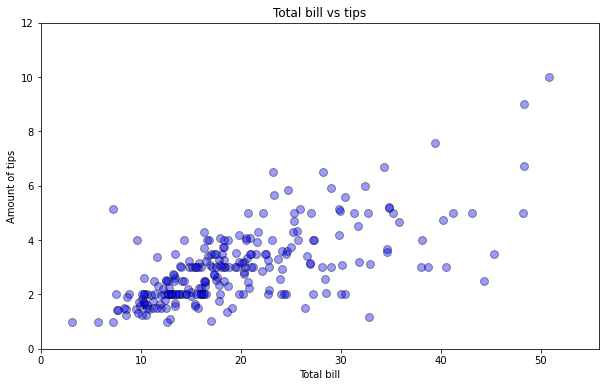

In [39]:
# Create data
fig, ax = plt.subplots(figsize=(10, 6)) 
x1 = df_tips.total_bill
y1 = df_tips.tip
colors = 'Blue'
area = np.pi*20

max_bill = df_tips.total_bill.max()
max_tip = df_tips.tip.max()

plt.axis([0, max_bill + 5, 0, max_tip + 2])

# Plot
plt.scatter(x1, y1, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Total bill vs tips')
plt.ylabel('Amount of tips')
plt.xlabel('Total bill')

plt.show()

La relació entre facturació (bills) i pròpines (tips) és relativament <span style=color:blue>nonlinear</span>, perquè la distribució dels punts no segueix clarament una línia

Podem fer també la comparació amb la quantitat de plats consumits

In [40]:
df_tips['size'].max()

6

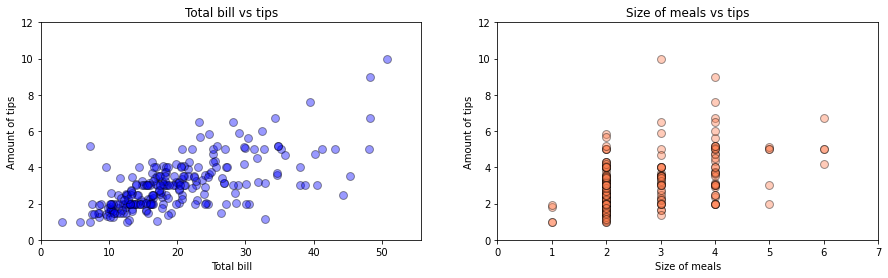

In [41]:
fig = plt.figure(figsize=(15,4))

max_bill = df_tips.total_bill.max()
max_tip = df_tips.tip.max()
max_size = df_tips['size'].max()

# Figure #1
ax1 = fig.add_subplot(1, 2, 1)

x1 = df_tips.total_bill
y1 = df_tips.tip
colors = 'Blue'
area = np.pi*20

max_bill = df_tips.total_bill.max()
max_tip = df_tips.tip.max()

plt.axis([0, max_bill + 5, 0, max_tip + 2])

# Plot
ax1.scatter(x1, y1, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Total bill vs tips')
plt.ylabel('Amount of tips')
plt.xlabel('Total bill')

# Figure #2
ax2 = fig.add_subplot(1, 2, 2)

y2 = df_tips.tip 
x2 = df_tips['size']
colors = 'Coral'
area = np.pi*20


plt.axis([0, max_size + 1, 0, max_tip + 2])

# Plot
ax2.scatter(x2, y1, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Size of meals vs tips')
plt.ylabel('Amount of tips')
plt.xlabel('Size of meals')


plt.show()

La quantitat de plats consumits no implica majors propines. 

### <span style=color:darkblue>MATRIX PLOTS</span>

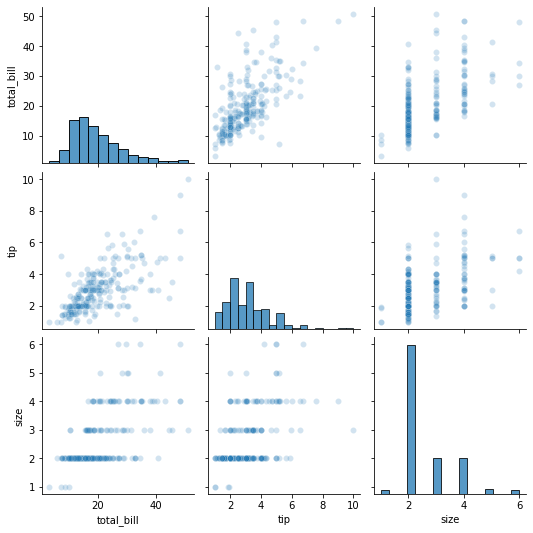

In [42]:
# Matrix Plot
sns.pairplot(df_tips, diag_kind='hist', plot_kws={'alpha': 0.2})


## <span style=color:darkgreen>HISTOGRAMS</span>

Text(0.5, 0, 'Size of meals')

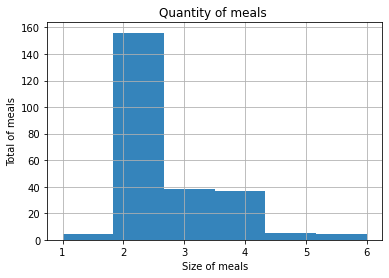

In [43]:
df_tips.hist(['size'], bins=6, alpha= 0.9)
plt.title('Quantity of meals ')
plt.ylabel('Total of meals')
plt.xlabel('Size of meals')


Clarament, la majoria d'àpats són de dos plats

### <span style=color:darkblue>SUMMARY STATISTICS</span>

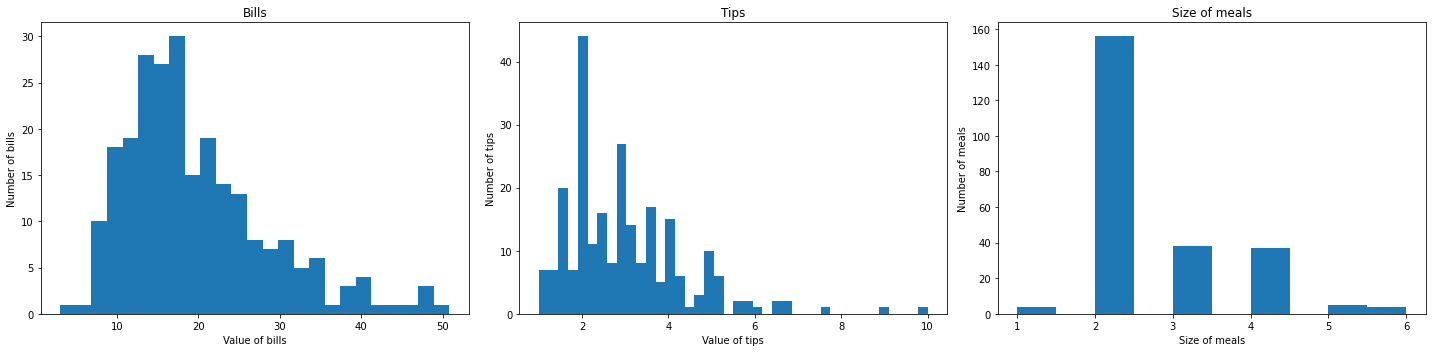

In [44]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 3, 1)

ax1.hist(df_tips['total_bill'], bins=25)
plt.title('Bills')
plt.ylabel('Number of bills')
plt.xlabel('Value of bills')


ax2 = fig.add_subplot(1, 3, 2)

ax2.hist(df_tips['tip'], bins=40)

plt.title('Tips')
plt.ylabel('Number of tips')
plt.xlabel('Value of tips')


ax3 = fig.add_subplot(1, 3, 3)

ax3.hist(df_tips['size'], bins=10)
plt.title('Size of meals')
plt.ylabel('Number of meals')
plt.xlabel('Size of meals')



# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

1) La majoria de comptes són d'uns 30 dòlars.

2) La majoria de pròpines són de 2 dòlars.

3) La majoria d'àpats són de 2 plats. 

## <span style=color:darkgreen>BOX PLOTS</span>

In [54]:
df_tips.total_bill.describe().round(2)

count    244.00
mean      19.79
std        8.90
min        3.07
25%       13.35
50%       17.80
75%       24.13
max       50.81
Name: total_bill, dtype: float64

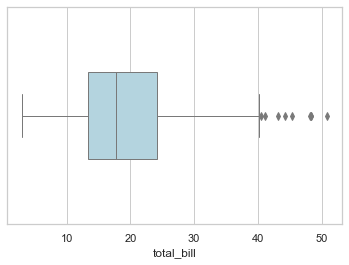

In [50]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_tips["total_bill"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.4)

En el boxplot es grafia la distibució estadística de les dades. 

La línia dins la caixa correspon separa la mitjana de les dades, i en aquest cas té el valor de 17.80 dòlars. Els altres límits de la caixa corresponen als valors centrals de la distribució, anomenats rang interquartil. Cobreixen entre el 25% i el 75% de la quantitatde casos (13.35 i 24.13 dòlars, respectivament).

Els valors entre les Ts de la caixa (també anomenats "bigotis") corresponen per defecte a 1.5 vegades cada rang interquartil, encara que aquest valor es pot modificar. Pot passar, com en aquest dataframe, que alguns valors quedin fora d'aquesta distribució per algun dels seus extrems, o amdós. Ho veiem en les pròpines que excedeixen del 40 dólars, fins al màxim de 50.81.

<AxesSubplot:xlabel='total_bill'>

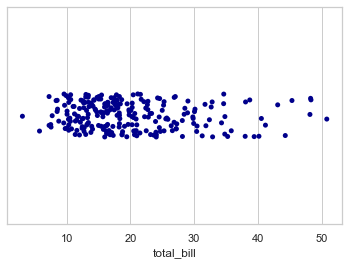

In [53]:
sns.stripplot(x=df_tips["total_bill"], orient='v', color='darkblue')

La distribució de punts informa del nombre d'aparicions de cada cas, aportant gràficament la informació de la densitat de les aparicions, així com de la distribució real del nombre de casos. Però no permet quantificar estadísticament la distibució de les dades. A més, si el dataframe és gran pot acabar per convertir-se en gran taca, que aporti una informació confusa.

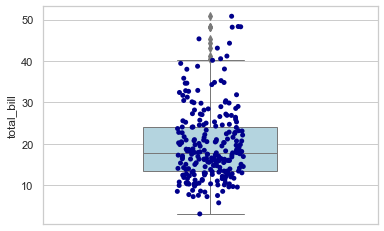

In [57]:
ax = sns.boxplot(y="total_bill", data=df_tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.4)
ax = sns.stripplot(y=df_tips["total_bill"], orient='v', color='darkblue')

La superposició de les dues gràfiques permet comprovar com funciona cadascun. En la part superior apareixen uns pocs outliers, mentre que dins la caixa de color blau es concentren el 50% del casos.

<AxesSubplot:xlabel='total_bill'>

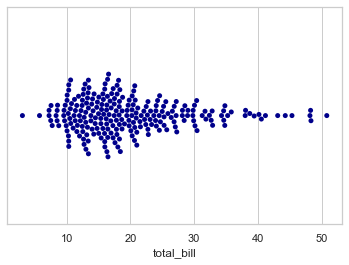

In [58]:
sns.swarmplot(x=df_tips["total_bill"], orient='v', color='darkblue')

In [ ]:
ax = sns.boxplot(y="total_bill", data=df_tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.4)
ax = sns.swarmplot(y="total_bill", data=df_tips, orient='v', color='darkblue', size = 4)

# Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

Per a més endavant

# Exercici 3

En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

Per a més endavant